In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

GenGB2021 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_GB_20210101-20211231.csv")

GenGB2021 = GenGB2021.replace('n/e', np.NaN)
GenGB2021 = GenGB2021.replace('N/A', np.NaN)

GenGB2021 = pd.DataFrame({'Date': GenGB2021.iloc[:,1],
                          'SP': GenGB2021.iloc[:,2],
                          'Wind [MW]': GenGB2021.iloc[:,7],
                          'PSH [MW]': GenGB2021.iloc[:,8],
                          'Hydro [MW]': GenGB2021.iloc[:,9]})

print(GenGB2021.to_string())

           Date  SP  Wind [MW]  PSH [MW]  Hydro [MW]
0      20210101   1       4489         0         383
1      20210101   2       4351         0         379
2      20210101   3       4258         0         349
3      20210101   4       4265         0         334
4      20210101   5       4365         0         328
5      20210101   6       4466         0         327
6      20210101   7       4404         0         320
7      20210101   8       4404         0         315
8      20210101   9       4524         0         315
9      20210101  10       4551         0         315
10     20210101  11       4731         0         314
11     20210101  12       4705         0         314
12     20210101  13       4625         0         320
13     20210101  14       4662         0         343
14     20210101  15       4759         0         388
15     20210101  16       4759         0         389
16     20210101  17       4853         0         402
17     20210101  18       4966         0      

In [2]:
import statistics
from itertools import islice
import numpy as np

def function():
    result = []
    for i in range(0, len(GenGB2021.iloc[:,0])):
        if i < 86:
            start = 48*i
            end = 48*(i+1)
            day = GenGB2021.iloc[start,0]
            opWi = statistics.mean(GenGB2021.iloc[start:end,2])/2
            opPS = statistics.mean(GenGB2021.iloc[start:end,3])/2
            opHy = statistics.mean(GenGB2021.iloc[start:end,4])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy})
        elif i == 86: # For some reason this day does not show in the DataFrame
            start = 48*i
            end = 4174
            day = GenGB2021.iloc[start,0]
            opWi = statistics.mean(GenGB2021.iloc[start:end,2])/2
            opPS = statistics.mean(GenGB2021.iloc[start:end,3])/2
            opHy = statistics.mean(GenGB2021.iloc[start:end,4])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy})
        elif 87 <= i < 303:
            start = 48*i-2
            end = 48*(i+1)-2
            day = GenGB2021.iloc[start,0]
            opWi = statistics.mean(GenGB2021.iloc[start:end,2])/2
            opPS = statistics.mean(GenGB2021.iloc[start:end,3])/2
            opHy = statistics.mean(GenGB2021.iloc[start:end,4])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy})
        elif i == 303:
            start = 48*i
            end = 14592
            day = GenGB2021.iloc[start,0]
            opWi = statistics.mean(GenGB2021.iloc[start:end,2])/2
            opPS = statistics.mean(GenGB2021.iloc[start:end,3])/2
            opHy = statistics.mean(GenGB2021.iloc[start:end,4])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy})
        elif 304 <= i < 365:
            start = 48*i
            end = 48*(i+1)
            day = GenGB2021.iloc[start,0]
            opWi = statistics.mean(GenGB2021.iloc[start:end,2])/2
            opPS = statistics.mean(GenGB2021.iloc[start:end,3])/2
            opHy = statistics.mean(GenGB2021.iloc[start:end,4])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy})
    df = pd.DataFrame(result, columns=['Day','Wind [MWh]','PSH [MWh]', 'Hydro [MWh]'])
    return df

GBGen2021 = function().round(2)
GBGen2021["Day"] = pd.date_range(start="1/1/2021", periods=365, freq="D")
print(GBGen2021.to_string())

           Day  Wind [MWh]  PSH [MWh]  Hydro [MWh]
0   2021-01-01     2090.02      61.56       213.50
1   2021-01-02     1863.98      84.52       202.62
2   2021-01-03     3106.30      72.21       193.25
3   2021-01-04     4229.12      60.46       191.59
4   2021-01-05     3794.17     135.92       193.47
5   2021-01-06     2180.43     261.21       274.42
6   2021-01-07     1708.27     234.58       302.06
7   2021-01-08     1612.08     220.42       240.84
8   2021-01-09     2326.11      81.19       173.68
9   2021-01-10     3102.47      69.12       212.00
10  2021-01-11     5677.66     120.83       250.12
11  2021-01-12     2727.15     187.88       302.81
12  2021-01-13     1601.20     297.50       347.49
13  2021-01-14     2901.65      96.40       296.25
14  2021-01-15     1878.94     242.38       344.09
15  2021-01-16     5667.64     108.54       264.25
16  2021-01-17     4834.81     124.02       314.77
17  2021-01-18     4990.00      98.75       339.38
18  2021-01-19     4101.36     

In [3]:
GenGB2022 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_GB_20220101-20221231.csv")

GenGB2022 = GenGB2022.replace('n/e', np.NaN)
GenGB2022 = GenGB2022.replace('N/A', np.NaN)

GenGB2022 = pd.DataFrame({'Date': GenGB2022.iloc[:,1],
                          'SP': GenGB2022.iloc[:,2],
                          'Wind [MW]': GenGB2022.iloc[:,7],
                          'PSH [MW]': GenGB2022.iloc[:,8],
                          'Hydro [MW]': GenGB2022.iloc[:,9]})

print(GenGB2022.to_string())

           Date  SP  Wind [MW]  PSH [MW]  Hydro [MW]
0      20220101   1      10332         0         286
1      20220101   2      10628         0         283
2      20220101   3      11139         0         260
3      20220101   4      11049         0         268
4      20220101   5      11307         0         248
5      20220101   6      11301         0         226
6      20220101   7      11772         0         218
7      20220101   8      11644         0         219
8      20220101   9      11395         0         218
9      20220101  10      11218         0         229
10     20220101  11      11302         0         214
11     20220101  12      11216         0         211
12     20220101  13      11684         0         228
13     20220101  14      12200         0         229
14     20220101  15      12549         0         249
15     20220101  16      12356         0         278
16     20220101  17      12415         0         277
17     20220101  18      12721         0      

In [4]:
import statistics
from itertools import islice
import numpy as np

def function():
    result = []
    for i in range(0, len(GenGB2022.iloc[:,0])):
        if i < 85:
            start = 48*i
            end = 48*(i+1)
            day = GenGB2022.iloc[start,0]
            opWi = statistics.mean(GenGB2022.iloc[start:end,2])/2
            opPS = statistics.mean(GenGB2022.iloc[start:end,3])/2
            opHy = statistics.mean(GenGB2022.iloc[start:end,4])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy})
        elif i == 85: # For some reason this day does not show in the DataFrame
            start = 48*i
            end = 4174
            day = GenGB2022.iloc[start,0]
            opWi = statistics.mean(GenGB2022.iloc[start:end,2])/2
            opPS = statistics.mean(GenGB2022.iloc[start:end,3])/2
            opHy = statistics.mean(GenGB2022.iloc[start:end,4])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy})
        elif 86 <= i < 302:
            start = 48*i-2
            end = 48*(i+1)-2
            day = GenGB2022.iloc[start,0]
            opWi = statistics.mean(GenGB2022.iloc[start:end,2])/2
            opPS = statistics.mean(GenGB2022.iloc[start:end,3])/2
            opHy = statistics.mean(GenGB2022.iloc[start:end,4])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy})
        elif i == 302:
            start = 48*i
            end = 14592
            day = GenGB2022.iloc[start,0]
            opWi = statistics.mean(GenGB2022.iloc[start:end,2])/2
            opPS = statistics.mean(GenGB2022.iloc[start:end,3])/2
            opHy = statistics.mean(GenGB2022.iloc[start:end,4])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy})
        elif 303 <= i < 365:
            start = 48*i
            end = 48*(i+1)
            day = GenGB2022.iloc[start,0]
            opWi = statistics.mean(GenGB2022.iloc[start:end,2])/2
            opPS = statistics.mean(GenGB2022.iloc[start:end,3])/2
            opHy = statistics.mean(GenGB2022.iloc[start:end,4])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy})
    df = pd.DataFrame(result, columns=['Day','Wind [MWh]','PSH [MWh]', 'Hydro [MWh]'])
    return df

GBGen2022 = function().round(2)
GBGen2022["Day"] = pd.date_range(start="1/1/2022", periods=365, freq="D")
print(GBGen2022.to_string())

           Day  Wind [MWh]  PSH [MWh]  Hydro [MWh]
0   2022-01-01     5998.43     220.38       143.34
1   2022-01-02     6259.69     225.60       161.53
2   2022-01-03     5746.86     215.69       310.95
3   2022-01-04     5372.62     218.04       348.78
4   2022-01-05     4968.27     158.65       368.09
5   2022-01-06     4912.54     104.04       265.76
6   2022-01-07     5520.75     163.54       317.73
7   2022-01-08     5533.66      82.54       249.33
8   2022-01-09     3737.44     152.52       263.77
9   2022-01-10     3615.39     128.85       226.91
10  2022-01-11     3057.40     156.71       272.47
11  2022-01-12     3112.49     193.40       247.73
12  2022-01-13     3123.19     132.58       275.79
13  2022-01-14      871.70     175.19       385.68
14  2022-01-15     1442.30     188.25       324.35
15  2022-01-16     3956.76      95.10       217.28
16  2022-01-17     2470.28     198.12       255.69
17  2022-01-18     3041.51     147.19       204.93
18  2022-01-19     5745.42     

In [5]:
GBGen = pd.concat([GBGen2021["Wind [MWh]"], GBGen2022["Wind [MWh]"]], ignore_index=True).to_frame("Wind [MWh]").astype(float)
GBGen["PSH [MWh]"] = pd.concat([GBGen2021["PSH [MWh]"], GBGen2022["PSH [MWh]"]], ignore_index=True).to_frame("PSH [MWh]").astype(float)
GBGen["Hydro [MWh]"] = pd.concat([GBGen2021["Hydro [MWh]"], GBGen2022["Hydro [MWh]"]], ignore_index=True).to_frame("Hydro [MWh]").astype(float)

GBGen["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "Wind [MWh]", "PSH [MWh]", "Hydro [MWh]"]

#GBGen["Wind [MWh]"] = pd.to_numeric(GBGen["Wind [MWh]"], errors='coerce')
GBGen = pd.DataFrame(GBGen)

#GBGen["BZN|FR"] = GBGen["BZN|FR"].round(2)

GBGen = GBGen.reindex(columns=NewOrder)

GBGen

,Date,Wind [MWh],PSH [MWh],Hydro [MWh]
0,2021-01-01,2090.02,61.56,213.50
1,2021-01-02,1863.98,84.52,202.62
2,2021-01-03,3106.30,72.21,193.25
3,2021-01-04,4229.12,60.46,191.59
4,2021-01-05,3794.17,135.92,193.47
...,...,...,...,...
725,2022-12-27,5808.75,199.29,231.27
726,2022-12-28,6341.16,223.35,224.17
727,2022-12-29,7178.36,283.73,259.52
728,2022-12-30,7746.45,81.44,226.10


(18591.55, 19393.45)


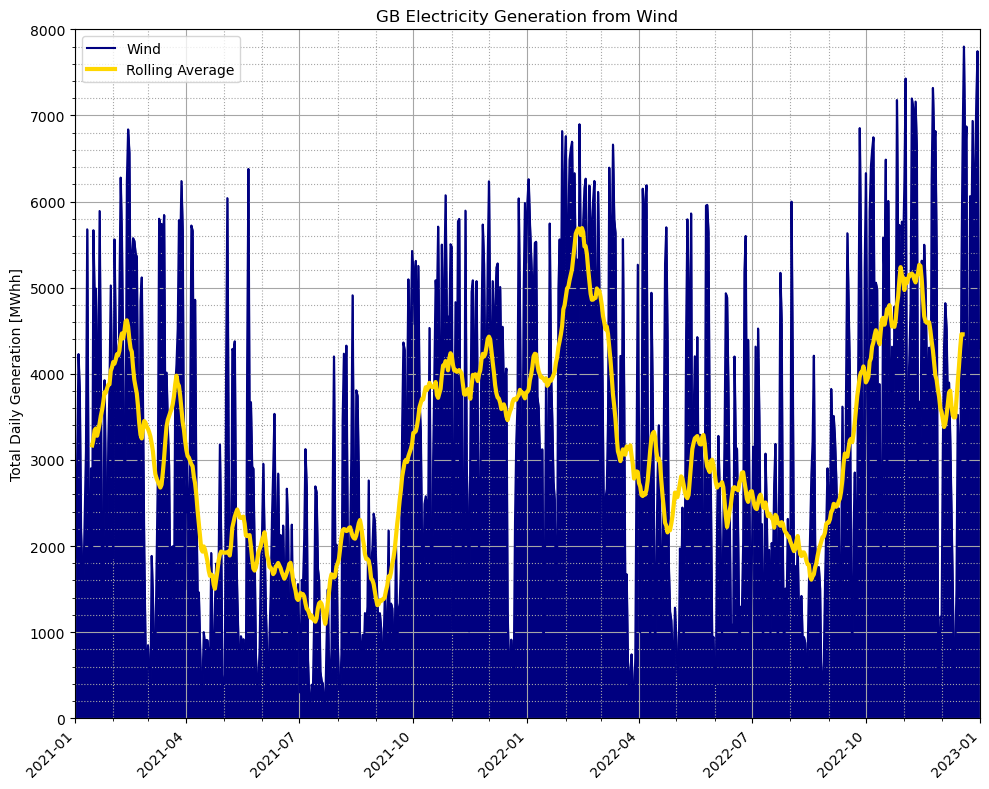

In [6]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title("GB Electricity Generation from Wind")
plt.ylabel('Total Daily Generation [MWhh]')

ax.plot(GBGen["Date"], GBGen["Wind [MWh]"], color="navy", label="Wind")
#ax.plot(GBGen["Date"], GBGen["PSH [MWh]"], label="PSH")
#ax.plot(GBGen["Date"], GBGen["Hydro [MWh]"], label="PSH")
ax.plot(GBGen["Date"], GBGen["Wind [MWh]"].rolling(28,  center=True).mean(), linewidth = 3, color = "gold", label="Rolling Average")
#ax.plot(ImportData["Date"], Mean, label="RMS", color='black')


plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_xlim())

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.ylim(0, 8000)
plt.tight_layout()

plt.fill_between(GBGen["Date"], GBGen["Wind [MWh]"], color="navy")

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()

In [11]:
%store -r BZGB

GBGen["GB Electricity DA [EUR/MWh]"] = BZGB["BZN|GB"]

NewOrder = ["Date", "GB Electricity DA [EUR/MWh]", "Wind [MWh]", "PSH [MWh]", "Hydro [MWh]"]
#GBGen = pd.DataFrame(GBGen)

GBGen = GBGen.reindex(columns=NewOrder)


print(GBGen.to_string())

          Date GB Electricity DA [EUR/MWh]  Wind [MWh]  PSH [MWh]  Hydro [MWh]
0   2021-01-01                        68.4     2090.02      61.56       213.50
1   2021-01-02                       71.54     1863.98      84.52       202.62
2   2021-01-03                       65.27     3106.30      72.21       193.25
3   2021-01-04                       67.32     4229.12      60.46       191.59
4   2021-01-05                        67.4     3794.17     135.92       193.47
5   2021-01-06                      160.07     2180.43     261.21       274.42
6   2021-01-07                      101.79     1708.27     234.58       302.06
7   2021-01-08                      115.46     1612.08     220.42       240.84
8   2021-01-09                       74.13     2326.11      81.19       173.68
9   2021-01-10                       76.47     3102.47      69.12       212.00
10  2021-01-11                       71.51     5677.66     120.83       250.12
11  2021-01-12                      126.26     2727.

[-4.66007927e-05  5.21824247e+00]
5.218242466813411


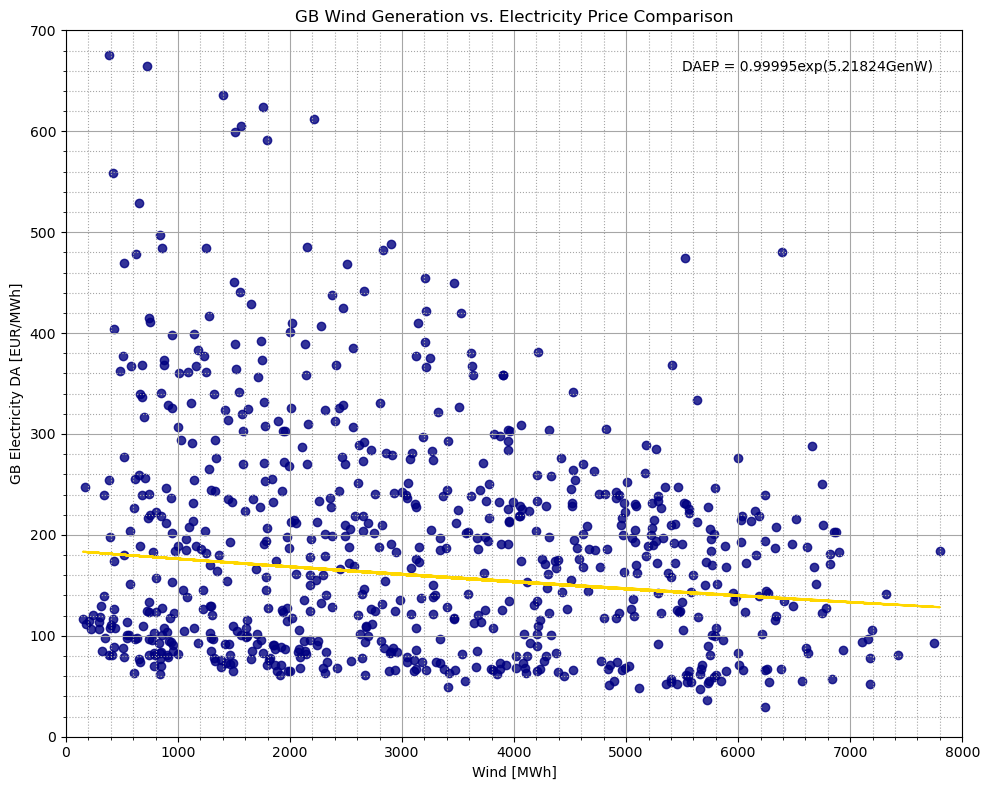

In [10]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import scipy

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('GB Wind Generation vs. Electricity Price Comparison')
plt.xlabel('GB Wind Generation [MWh]')
plt.ylabel('Electricity DA Price [EUR/MWh]')

#ax.scatter(GBGen["Wind [MWh]"], GBGen["GB Electricity DA [EUR/MWh]"], color = "navy")

sns.regplot(x=GBGen["Wind [MWh]"].astype(float), 
            y=GBGen["GB Electricity DA [EUR/MWh]"].astype(float), 
            scatter = True, ci = 100, fit_reg = False,
            scatter_kws = {"color": "navy"}, line_kws = {"color": "gold"}, order=1)

#slope, intercept, r, GBGen, sterr = scipy.stats.linregress(x=GBGen["Wind [MWh]"].astype(float),
#                                                       y=GBGen["GB Electricity DA [EUR/MWh]"].astype(float))

#plt.text(5500, 660, 'DAEP = ' + str(round(slope,3)) + '×GenW + ' + str(round(intercept,3)))

x_data = np.array(GBGen["Wind [MWh]"]).astype(float)
y_data = np.array(GBGen["GB Electricity DA [EUR/MWh]"]).astype(float)

log_y_data = np.log(y_data)

curve_fit = np.polyfit(x_data, log_y_data, 1)
print(curve_fit)
print(curve_fit[1])

ycurve = np.exp(curve_fit[1])*np.exp(curve_fit[0]*x_data)

plt.plot(x_data, ycurve, color="gold")

plt.text(5500, 660, 'DAEP = ' + str(round((math.e)**curve_fit[0], 5)) + 'exp(' + str(round(curve_fit[1],5)) + 'GenW)')

#plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

#fig.autofmt_xdate()

#plt.tick_params(axis='x', which='major', labelsize=10)
#plt.xticks(rotation=45, ha='right')
plt.xlim(0, 8000)
plt.ylim(0, 700)
plt.tight_layout()

#ax.xaxis.set_minor_locator(mdates.MonthLocator())
#ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()